In [1]:
# Importing Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [2]:
# Importing and storing the dataset in a Pandas dataframe
df = pd.read_csv("./Advertising.csv", usecols=['TV', 'sales'])

#### Inspecting the dataset

In [3]:
df.head()

,TV,sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9


#### Checking the datatype for each column

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TV      200 non-null    float64
 1   sales   200 non-null    float64
dtypes: float64(2)
memory usage: 3.3 KB


#### Insight 1: There are 2 columns (namely TV and sales) and 200 rows in the dataset.
#### Insight 2: Both columns are of float data type.
#### Insight 3: Since it has only one independent variable (TV), and the dependent variable is continuous (sales), we can use simple linear regression for it. 

#### Checking whether there are any missing values in our dataset.

In [5]:
# Checking for missing values
df.isnull().sum()

TV       0
sales    0
dtype: int64

#### Insight: There are no missing values in the dataset

#### Plotting box plot: To check whether there are outliers in our dataset visually

<Axes: ylabel='TV'>

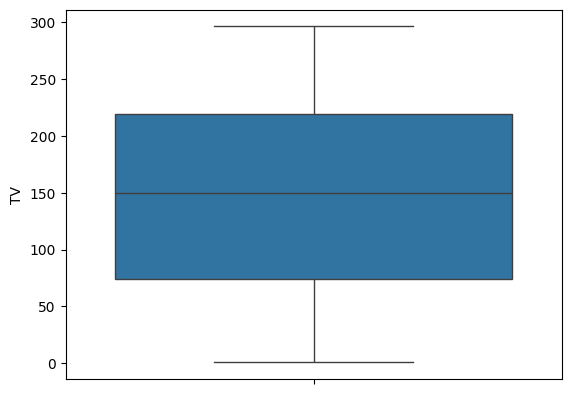

In [6]:
# Checking for outliers visually 
sns.boxplot(df['TV'])

#### Checking skewness of TV column (feature) to check how much it deviates from normal distribution.

In [7]:
# Checking Skewness - Deviation from normal distribution
df['TV'].skew()

np.float64(-0.06985336213274573)

#### Insight: TV column is negatively skewed (left-skewed). However, it is almost symmetric)

#### Checking the KDE plot to guide further steps (such as which technique to use in checking for outliers.)
#### If data is normally distributed, we use Z-score method. Otherwise, we use IQR method.

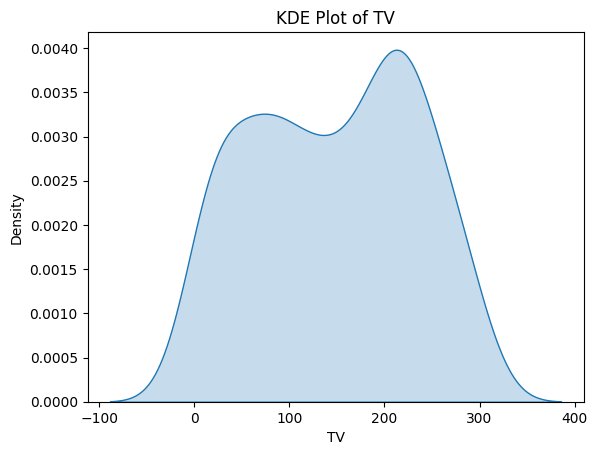

In [8]:
# checking shape of distribution visually
sns.kdeplot(df['TV'], fill=True)  # 'fill' replaces 'shade' in newer versions
plt.title('KDE Plot of TV')
plt.show()

#### Insight: Since the distribution for TV column is non-normal, we use IQR method for detecting outliers.

In [9]:
# Function to detect outliers using IQR method
def find_outliers_IQR(df, col):
    q1 = df[col].quantile(0.25)         # 25th percentile (Q1)
    q3 = df[col].quantile(0.75)         # 75th percentile (Q3)
    IQR = q3 - q1                       # Interquartile Range
    lower_fence = q1 - 1.5 * IQR        # Lower bound for outliers
    upper_fence = q3 + 1.5 * IQR        # Upper bound for outliers
    outliers = df[col][(df[col] < lower_fence) | (df[col] > upper_fence)]
    return outliers                     # Returns a Series of outlier values

In [10]:
outliers = find_outliers_IQR(df, 'TV')
print(len(outliers))

0


#### Insight: There are no outliers in the dataset. 

In [11]:
# Splitting dataset into X (known as Design matrix) and y (called response variable / target variable / dependent variable)
X = df[['TV']]
y = df[['sales']]

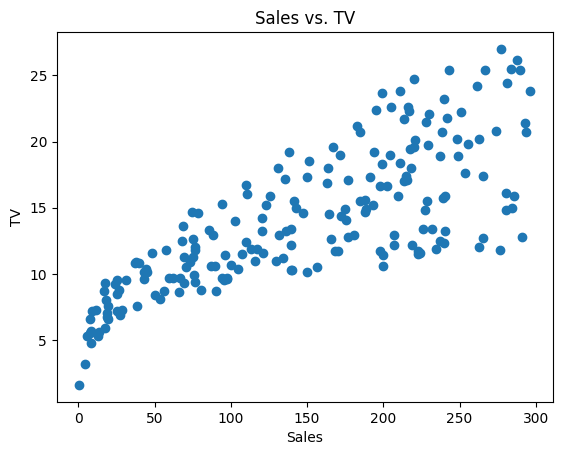

In [12]:
# Plotting a scatter plot for Sales vs. TV
plt.scatter(X, y)
plt.title("Sales vs. TV")
plt.xlabel("Sales")
plt.ylabel("TV")
plt.show()

#### Insight: Sales and TV columns have a linear relationship. 

#### Fitting our model on the whole dataset.

In [13]:
# Training the model
reg_model = LinearRegression().fit(X, y)

#### Obtaining regression coefficients: slope and intercept

In [14]:
# Checking regresssion coefficients (slope and intercept)
slope = reg_model.coef_[0][0]
intercept = reg_model.intercept_[0]
print("Slope is: ", slope)
print("Intercept: ", intercept)

Slope is:  0.04753664043301975
Intercept:  7.032593549127695


#### Obtaining prediction for a single feature vector.

In [15]:
# Predictiing for a single observation
observation = pd.DataFrame([{'TV': 230.1}])
reg_model.predict(observation)

array([[17.97077451]])

#### Obtaining predictions for entire dataset (more precisely: for entire design matrix)

In [16]:
# Predicting for entire dataset
y_true = df['sales']
y_pred = reg_model.predict(df[['TV']])

#### Plotting Best fit line

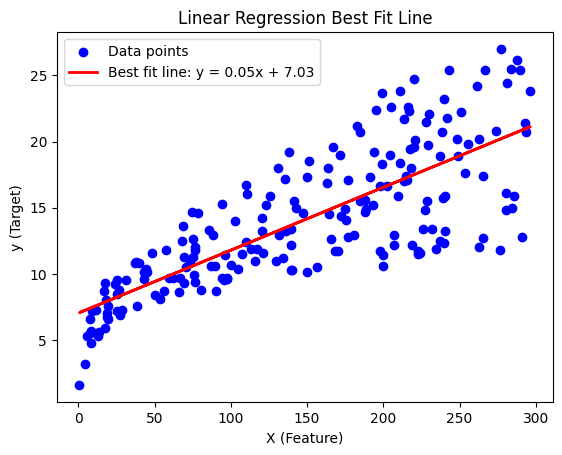

In [17]:
# Plotting the original data points
plt.scatter(X, y, color='blue', label='Data points')

# Plotting the best fit line
plt.plot(X, y_pred, color='red', linewidth=2, label=f'Best fit line: y = {slope:.2f}x + {intercept:.2f}')

# Adding labels and legend
plt.xlabel('X (Feature)')
plt.ylabel('y (Target)')
plt.title('Linear Regression Best Fit Line')
plt.legend()

# Showing the plot
plt.show()

### Evaluating our trained model: 

In [18]:
# Calculating mean squared error
mean_squared_error(y_true, y_pred)

10.512652915656757

### Why use this ?
#### Ans: Because it is usually default for gradient based optimization (since it is Differentiable). 
#### Note: Although, other metrics can be used, but only for evaluation. 

In [19]:
# Calculating r2_score - How much variance in the original dataset is explained by our model. Ranges between 0 and 1. 
r2_score(y_true, y_pred)

0.611875050850071

### Why use this ?
#### Ans: Because it calculates how much variance in the original dataset is explained by our model. (Ranges between 0 and 1). Also, it is  much more interpretable as compared to other evalution metrics.

## Summary:
### 1. There are no missing values and outliers in the dataset (verified by IQR/ box plots). 
### 2. Independent variable (TV) is left skewed (skewness = 0.06), but nearly symmetric.(thereshold is abs(0.5). 
### 3. Slope of trained model is 0.047: For every unit increase in TV ad spending, sales increase by ~0.047 units. 
### 4. Intercept of trained model is 7.03: Baseline sales when TV ads are zero. 
### 5. Trained model is basically the best fit line that minimizes Ordinary least squares (OLS) error. 
### 6. Mean squared error: 10.51. - Ideal for Gradient descent, since it is differentiable.  
### 7. R2 score: 0.61. - 61% of variance in the dataset is explained in model. It is slightly better than just guessing the average.
### Further improvements: L1/L2/Elastic net regularization, and hyperparameter tuning technoques.  Stay tuned !